# 모형 진단과 수정
- `회귀분석의 결과의 진단 diagnosis` : 회귀분석에 사용 된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지 확인하는 과정 

## 1. 잔차 정규성
- 데이터가 모형 가정을 만족하면 잔차는 정규분포를 따라야한다.
    - "확률론적 선형회귀모형"에서 잔차는 잡음의 선형변환이므로 잡음의 분포 형태인 정규분포를 따른다고 했었다. 

### 1-1. 2차 비선형 관계의 데이터의 회귀 분석

In [1]:
from sklearn.datasets import make_regression

In [2]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0) : 
    np.random.seed(random_state)
    
    # 균일분포 샘플 데이터 생성
    x = np.random.rand(n_sample) * 4
    
    # 표준정규분포 샘플 데이터 생성
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

In [3]:
np.random.rand(20) * 4

array([2.65833047, 2.29324684, 0.05650575, 1.67865614, 2.40302345,
       2.00486816, 2.47520726, 0.7675803 , 3.38283958, 0.18558829,
       2.19485556, 0.91925014, 2.36960297, 3.56629092, 2.35910155,
       3.66250332, 1.15690589, 3.10080691, 3.00835607, 3.00854927])

In [4]:
np.random.randn(20)

array([ 0.5895601 ,  0.17628577,  1.49263274,  1.19542374,  0.05063783,
        0.49298624, -0.24172848, -0.08396764,  1.2853382 ,  0.46497169,
       -2.78540721, -0.45125719, -0.16513894, -0.53096594,  1.74593055,
        0.02075247, -1.11717195, -0.90861142,  0.19973467, -1.09457956])

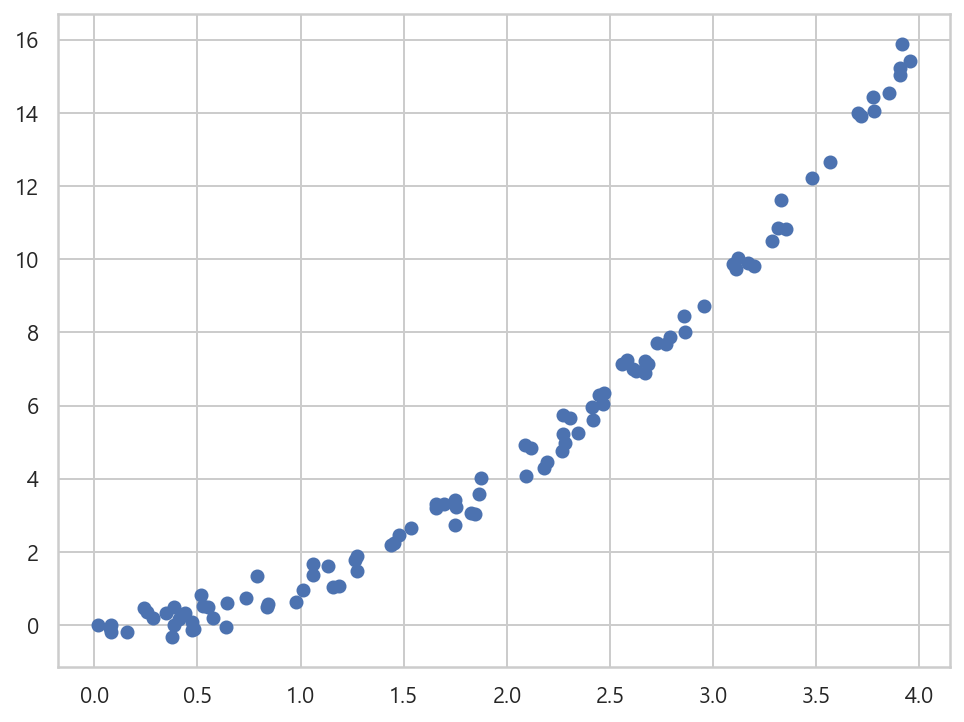

In [5]:
%matplotlib inline

x2, y2 = make_regression2()
plt.figure(figsize=(8, 6))
plt.scatter(x2, y2)
plt.show() ; 

In [6]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

### 잔차를 Q-Q 플롯으로 나타내기
- 잔차가 정규분포를 따르지 않는다

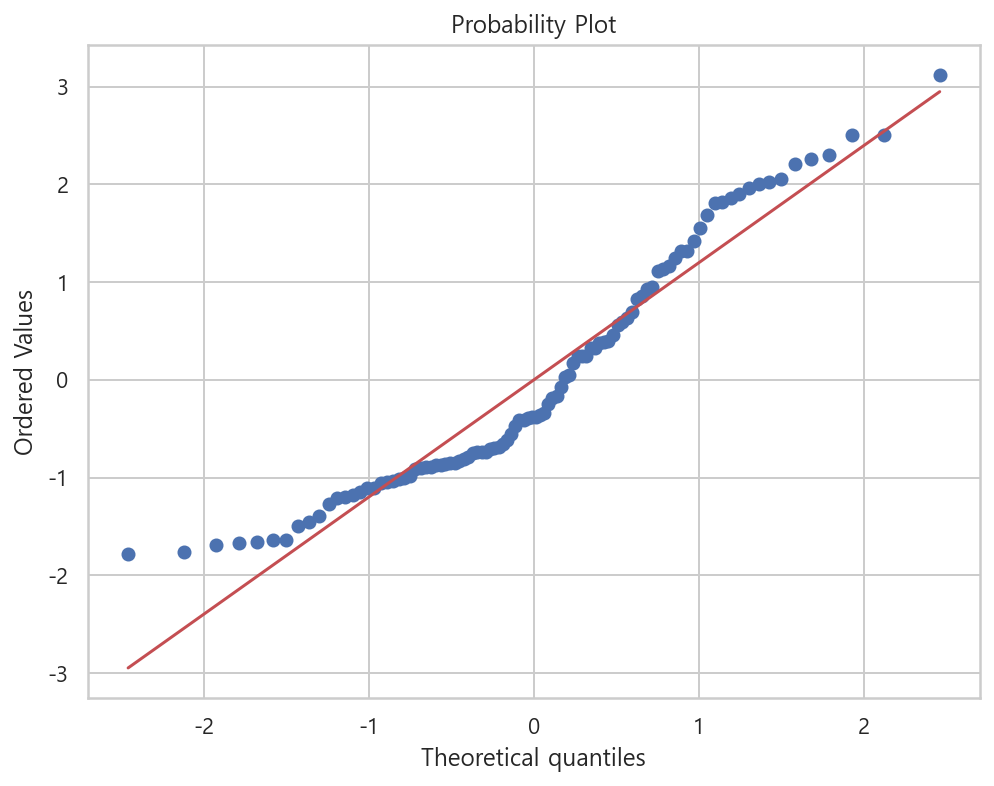

In [7]:
plt.figure(figsize=(8, 6))
sp.stats.probplot(result2.resid, plot=plt)
plt.show() ; 

### 잔차에 대한 정규성 검정
- 정규성 검정에서 p-value의 기준인 유의수준은 0.05로 보는 것 같다.
- 정규성 검정의 가설
    - H0 : 귀무가설 : 이 데이터는 정규분포를 따른다.
    - H1 : 대립가설 : 이 데이터는 정규분포를 따르지 않는다.
    - 여기에서는 잔차의 정규성을 검정하므로 잔차가 정규분포인지 아닌지를 확인한다.
- p-value 가 유의수준 보다 크면 귀무가설이 채택된다. 대립가설은 기각된다.
- p-value 가 유의수준 보다 작으면 귀무가설이 기각된다. 대립가설이 채택된다.
- 유의수준은 데이터 분석의 상황에 따라서 달라진다고 했으나, 대체로 0.05를 기준으로 잡는 것 같다. 
- p-value : 0.009 이므로 유의수준 보다 작다. 따라서 귀무가설이 기각되고 대립가설 채택되므로 현재 잔차 데이터는 정규분포를 따르지 않는다고 할 수 있다. 

In [8]:
test = sm.stats.omni_normtest(result2.resid)

for xi in zip(["Chi^2", "P-value"], test) : 
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


## 잔차와 독립변수의 관계

### 2차 함수 관계를 따르는 데이터 
- 선형 모형이 아니다

In [1]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0) : 
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

### 데이터의 분포
- 비선형 분포이므로 잔차가 정규분포를 따르지 않는다고 볼 수 있다.
- 그런데 잔차의 분포를 분석해보면 정규분포를 따른다고 나온다.
- 이런 경우는 잔차와 독립변수 간의 상관관계를 확인해 보아야 한다.

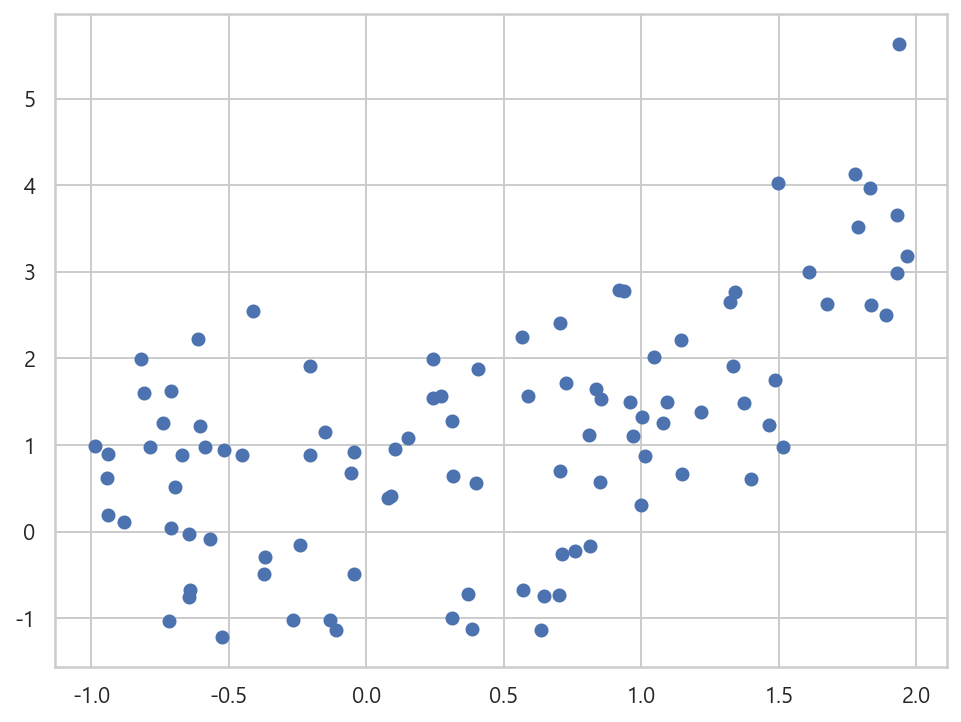

In [6]:
x3, y3 = make_regression3()
plt.figure(figsize=(8, 6))
plt.scatter(x3, y3)
plt.show() ;

In [3]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

### Q-Q 플롯으로 잔차 확인
- 데이터가 모형 가정을 따르지는 않지만 잔차는 정규 분포를 따른다.

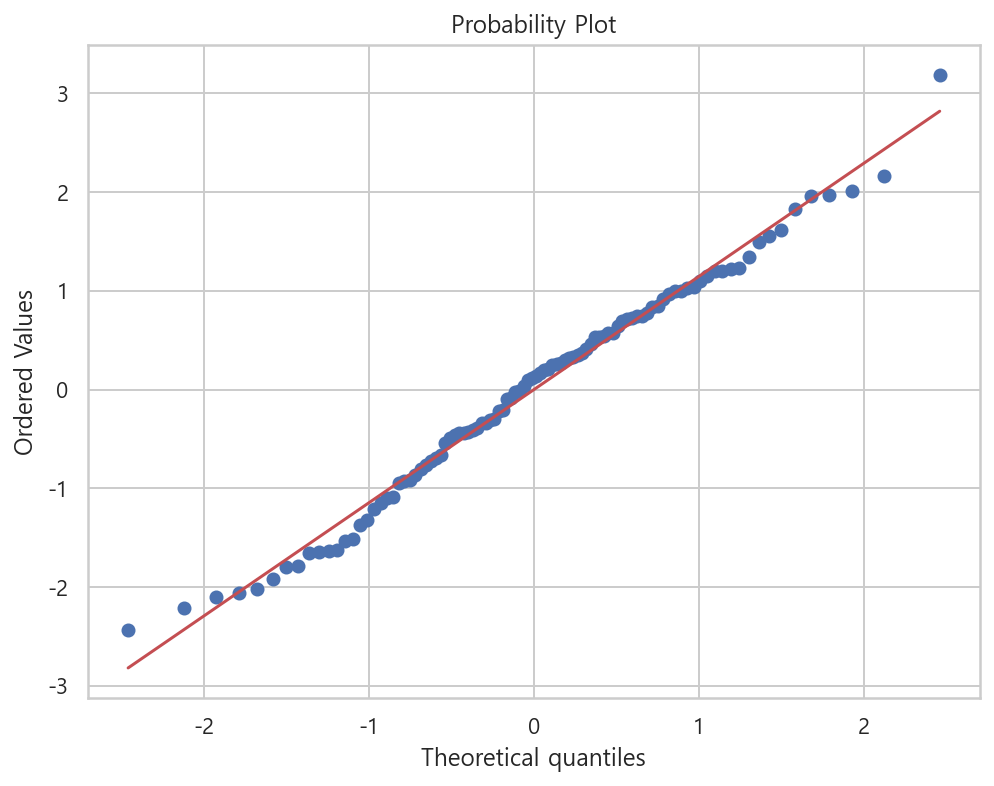

In [5]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sp.stats.probplot(result3.resid, plot=plt)
plt.show() ; 

### 정규성 검정
- p-value가 0.05보다 크므로 잔차는 정규분포를 따른다고 볼 수 있다.

In [16]:
test = sm.stats.omni_normtest(result3.resid)

for xi in zip(["Chi^2", "P-value"], test) : 
    print("%-12s: %6.3f" % xi)

Chi^2       :  0.346
P-value     :  0.841


### 잔차와 독립변수의 상관관계
- 데이터가 모형의 가정을 따르지 않는데 잔차가 정규분포를 따른다면, 잔차와 독립변수간의 상관관계가 있는지 확인 해보는 것도 방법이다.
- 데이터가 올바른 모형으로 분석되었으면 잔차는 독립변수와 더이상 상관관계를 가지지 않아야 한다. 
- 잔차와 독립변수간에 어떠한 상관관계라도 찾을 수 있다면 올바른 모형이 아니라는 의미이다. 

### 피어슨 상관계수
- 피어슨 상관계수로 독립변수와 잔차벡터의 상관관계를 분석해본다.
- 피어슨 상관계수는 두 확률변수의 상관관계가 선형적일 때만 상관관계를 계산해준다. 즉 비선형적일 때는 상관계수가 0으로 나온다.
- `비선형 상관관계` : 그러나 상관계수 값이 0이라고 해서 상관관계가 없는 것은 아니다. 
    - 선형이 아닌 모양의 상관관계
    - 어떤 확률변수의 값을 알고 있을때 다른 확률변수의 값에 대한 정보를 알 수 있으면 상관관계가 있다고 할 수 있다.
- 이 경우에는 비선형 관계이므로 피어슨 상관계수가 0으로 나오고, 상관관계는 있으므로 1이 나온다.
    - **잔차와 독립변수간의 어떠한 상관관계라도 있으면 올바른 모형이 아니라는 의미이다.**

In [8]:
pearson_test = sp.stats.pearsonr(x3, result3.resid)
for xi in zip(["상관계수", "상관관계"], pearson_test) :
    print("%-5s : %6.3f" % xi)

상관계수  :  0.000
상관관계  :  1.000


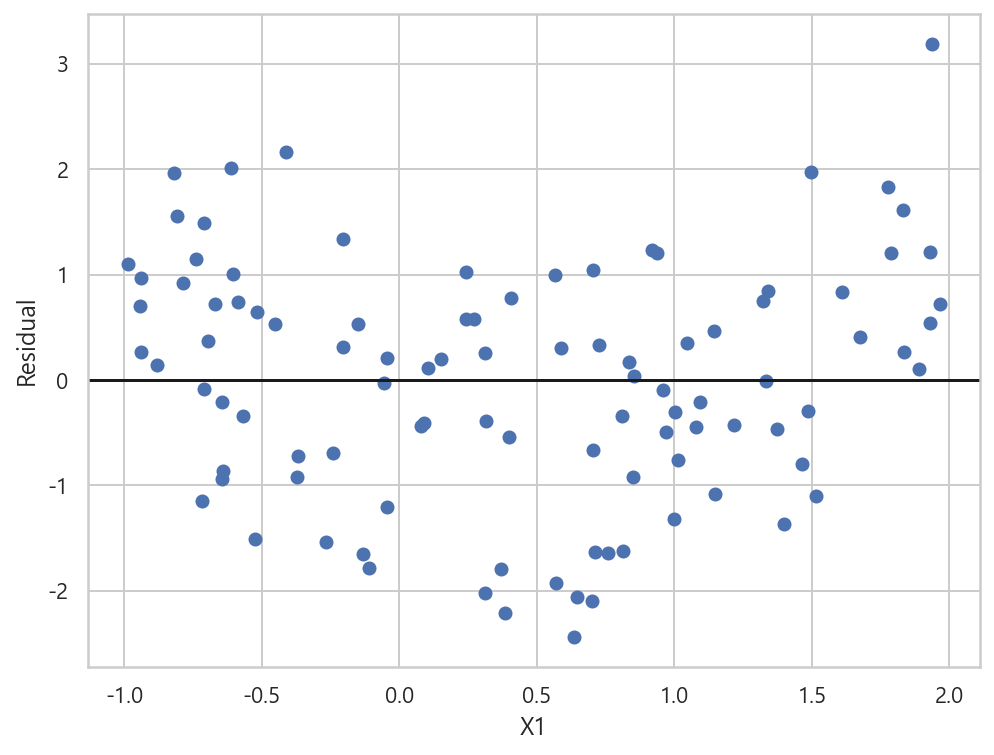

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c="k")
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show() ; 

## 이분산성
- 선형회귀 모형에서는 종속 변수 값의 분산은 독립변수와 상관없이 고정값을 가져야 한다. 
- `이분산성 heteroskedastic` : 실제데이터에서 독립변수의 값이 커지면 종속 변수 값의 분산도 커지는 현상
    - 종속변수를 로그 변환한 트랜스로그 모형을 사용하면 이분산성 문제가 해결되는 경우가 있다.

In [9]:
from sklearn.datasets import load_diabetes

In [10]:
diabetes = load_diabetes()
column_data = ["x%d" % (i+1) for i in range(diabetes.data.shape[1])]
df = pd.concat([pd.DataFrame(diabetes.data, columns=column_data),
                pd.DataFrame(diabetes.target, columns=["target"])], axis=1)

In [11]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [12]:
model_d = sm.OLS.from_formula("target ~ x9", data=df)
result_d = model_d.fit()

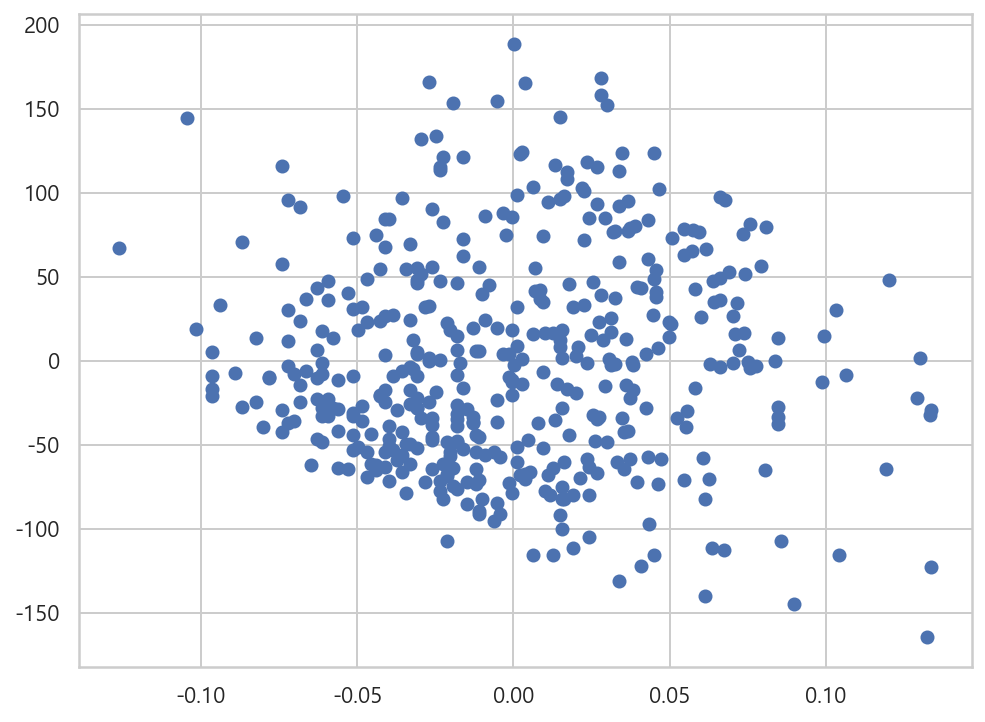

In [14]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(df["x9"], result_d.resid)
plt.show() ; 

### 이분산성 검정
- 이분산성의 검정
    - 독립변수의 값이 커질 수록 종속변수의 분산이 커지는 경향
    - 올바른 모형에서는 종속변수의 분산은 독립변수와 상관없이 일정해야 하지만 현실 데이터에서는 이분산성 경향이 발생함
- p-value 값이 유의수준보다 크므로 이분산성 관계라고 볼 수 있다????

In [15]:
name = ["Lagrange multiplier", "p-value", "f-value", "fp-value"]
test = sm.stats.het_breuschpagan(result_d.resid, result_d.model.exog)
for xi in zip(name, test) : 
    print("%-20s : %6.3f" % xi)

Lagrange multiplier  :  9.636
p-value              :  0.002
f-value              :  9.806
fp-value             :  0.002


In [16]:
name = ["F statistic", "p-value"]
test = sm.stats.het_goldfeldquandt(result_d.resid, result_d.model.exog)
for xi in zip(name, test) : 
    print("%-20s : %6.3f" % xi)

F statistic          :  1.091
p-value              :  0.260


## 자기 상관 계수
- 선형회귀 모형에서 오차(disturbance)는 서로 독립(모수-조건부)이라고 가정한다.
    - "확률론적 선형회귀 모형"에서 조건부 독립 가정에 대한 내용
- 따라서 잔차(residual)도 서로 독립이어야 한다. 
    - 잔차는 잡음의 선형 변환이기 때문에 잡음의 특징을 따른다.
- 서로 독립이 아니면 선형회귀 모형이 아닌 **ARMA 모형** 등 시계열 모형을 사용해야 한다.
- `오차가 독립인지 구하는 방법`
    - **잔차를 시계열로 가정하고 자기 상관계수를 구한다.**
    - 만약 오차가 독립이라면 시차(lag)가 0인 경우를 제외하면 자기상관계수 $\rho_l=0$ 이어야 한다.
    - Box-Pierce 검정
    - Ljung-Box 검정
    - Durbin-Watson 검정
- 이 검정들이 검정하는 귀무가설
    - $H_0 : \rho_l = 0 \;\; for \;\; i = 1, 2, \cdots, l$
- 회귀분석의 성능 향상과 모형의 제한조건을 충족시키기 위해서 모형을 비선형으로 변형하는 방법에 대해서 알아본다.     

## 비선형 변형
- 독립변수와 종속변수간의 관계가 비선형일때 이 관계를 선형으로 바꾸어 주는 한 방법.
    - 독립변수를 비선형 변환해준다.
    - 독립변수를 제곱한 것을 추가 해준다.
    - 실수형 독립변수를 강제로 범주형 독립변수로 바꿔준다.

### 보스턴 집값 데이터에서 LSTAT 데이터 
- 종속변수인 집값과 독립변수인 LSTAT 데이터는 비선형 상관관계이다.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

In [2]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


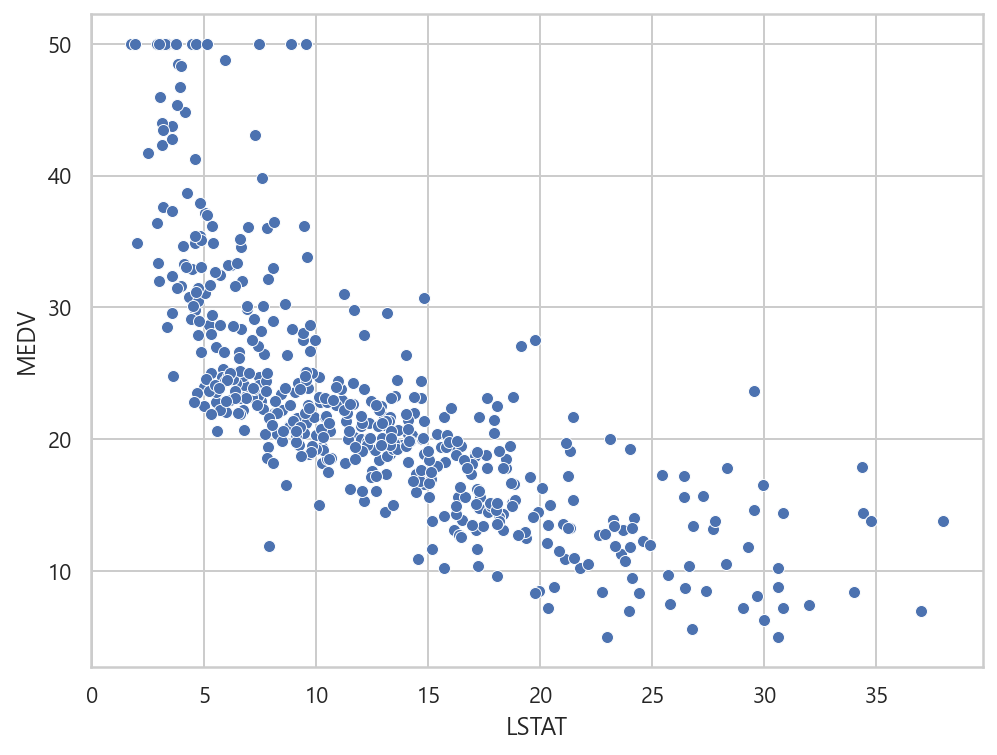

In [3]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show() ; 

### OLS로 분석하여 구한 선형모형

In [4]:
model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        16:18:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [5]:
result1.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [7]:
print("TSS = ", result1.uncentered_tss)
print("ESS = ", result1.mse_model)
print("RSS = ", result1.ssr)
print("ESS + RSS = ", result1.mse_model + result1.ssr)
print("R squared = ", result1.rsquared)
print("AIC = ", result1.aic)
print("BIC = ", result1.bic)

TSS =  299626.34
ESS =  23243.913996693333
RSS =  19472.381418326437
ESS + RSS =  42716.29541501977
R squared =  0.5441462975864799
AIC =  3286.974956900157
BIC =  3295.428030238732


### 예측값과 실제 데이터를 비교
- 선형모형이 맞지 않다는 것을 알 수 있다.

In [8]:
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]

In [9]:
df1.head()

,Prediction,LSTAT
161,32.910255,1.73
162,32.729746,1.92
40,32.672743,1.98
232,32.207219,2.47
192,31.827199,2.87


In [10]:
y_hat1

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

<Figure size 576x432 with 0 Axes>

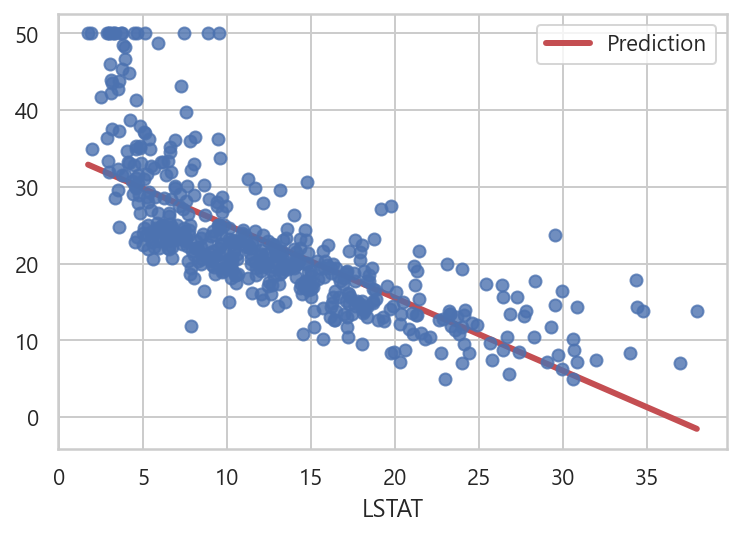

In [11]:
plt.figure(figsize=(8, 6))
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.8)
plt.show() ;

### 비선형 독립변수를 추가하면?
- LSTAT를 제곱한 비선형 독립변수를 추가하면 결과가 향상된다.
    - 결정계수 R^2 증가
    - F-statistics 감소
    - AIC, BIC 감소

In [12]:
model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT ** 2)", data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          1.56e-112
Time:                        16:26:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [13]:
result1.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [14]:
result2.params

Intercept        42.862007
LSTAT            -2.332821
I(LSTAT ** 2)     0.043547
dtype: float64

### 예측값과 실제값을 비교
- 선형모형보다 적합한 모형임을 알 수 있다.

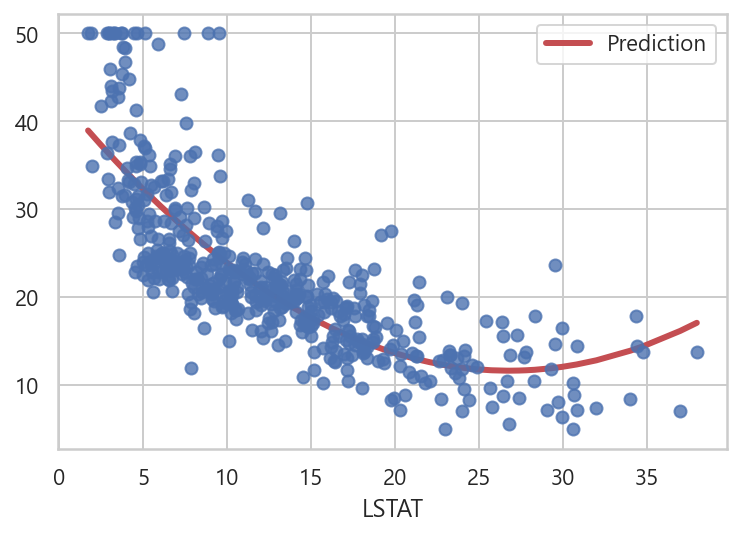

In [15]:
y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]

df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.8)
plt.show() ; 

### 비선형 변환 독립변수 추가 전후 예측값과 실제값의 비교
- 비선형 변환 독립변수를 추가한 이후 모형의 성능이 나아졌다고 볼 수 있다.

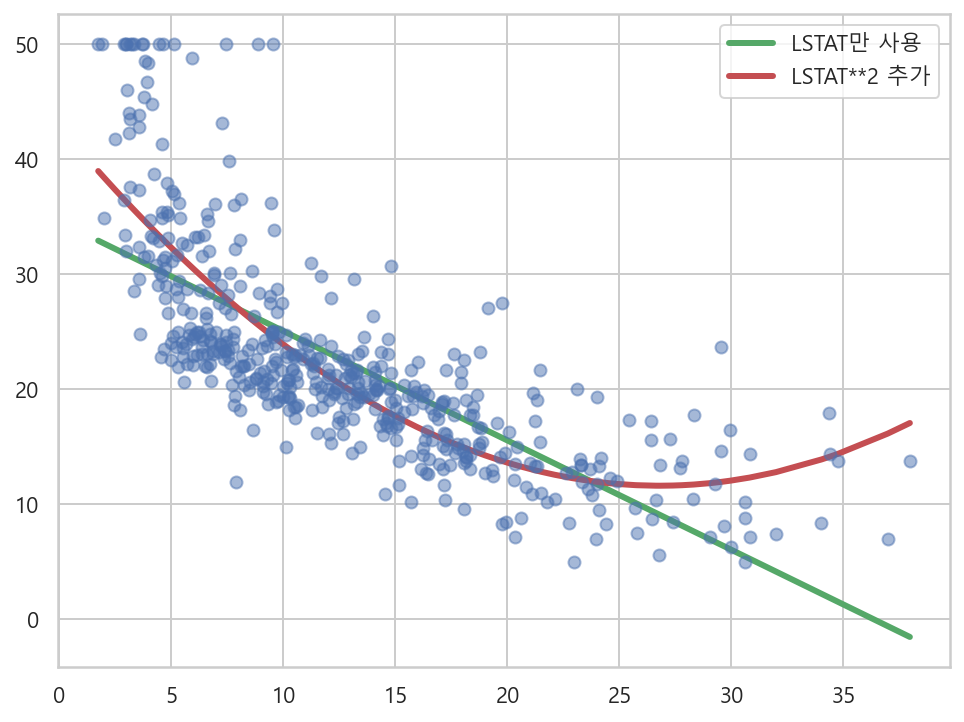

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(df1.LSTAT, df1.Prediction, "g-", lw=3, label="LSTAT만 사용")
plt.plot(df2.LSTAT, df2.Prediction, "r-", lw=3, label="LSTAT**2 추가")
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.legend()
plt.show() ;

## 범주형을 사용한 비선형성
- 독립변수의 비선형성을 포착하는 다른 방법
    - 독립변수를 강제로 범주형 독립변수로 만들어 준다.
    - 범주형 값이 되면서 오차는 생기지만 비선형성으로 얻을 수 있는 이익이 클 수 있다.

### RM과 종속변수의 관계
- RM 독립변수와 종속변수는 선형에 가깝다. 그러나 방의 갯수가 아주 작거나 아주 크면 선형 모형에서 벗어나는 듯한 관계이다.

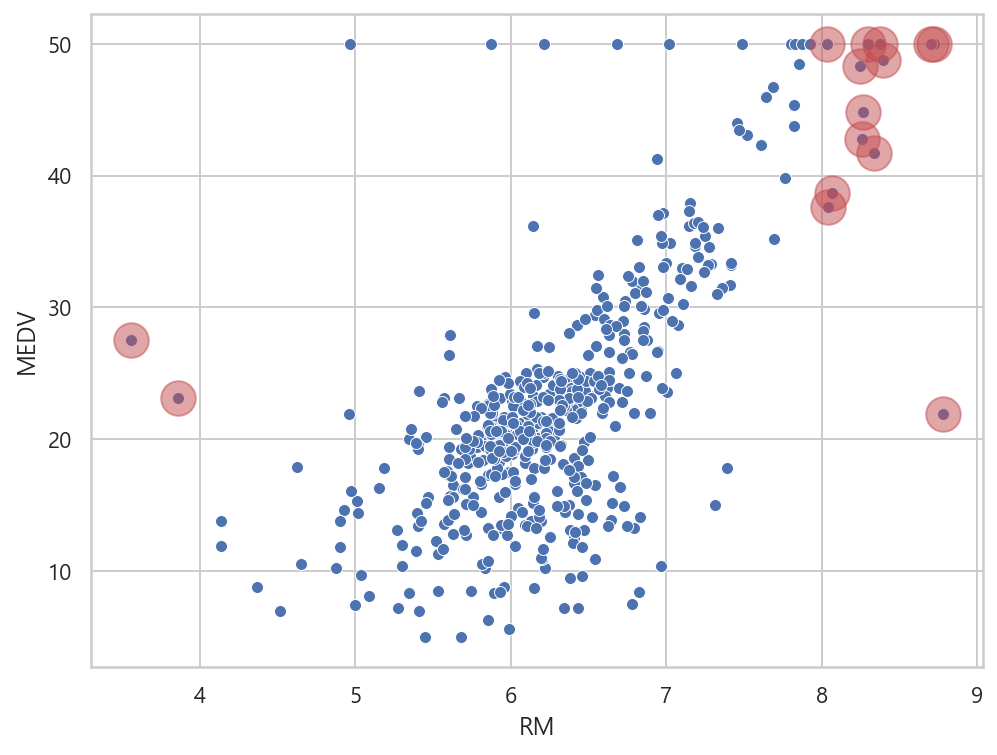

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.scatter(df_boston["RM"].iloc[idx], df_boston["MEDV"].iloc[idx],
                s=300, c="r", alpha=0.5)
plt.show() ; 

In [54]:
idx = list((df_boston.RM < 4) | (df_boston.RM > 8))
idx

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [78]:
df_boston["RM"].iloc[idx]

97     8.069
163    8.375
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
364    8.780
365    3.561
367    3.863
Name: RM, dtype: float64

In [79]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.49e-74
Time:                        15:55:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

### RM 독립변수를 강제로 범주값으로 변환
- 정수로 라운딩(rounding)하면 RM 변수가 가지는 비선형성을 잡을 수 있다.

In [80]:
rooms = np.arange(3, 10)
labels = [str(r) for r in rooms[:-1]]
labels

['3', '4', '5', '6', '7', '8']

In [82]:
df_boston["CAT_RM"] = np.round(df_boston.RM)
df_boston["CAT_RM"]

0      7.0
1      6.0
2      7.0
3      7.0
4      7.0
      ... 
501    7.0
502    6.0
503    7.0
504    7.0
505    6.0
Name: CAT_RM, Length: 506, dtype: float64

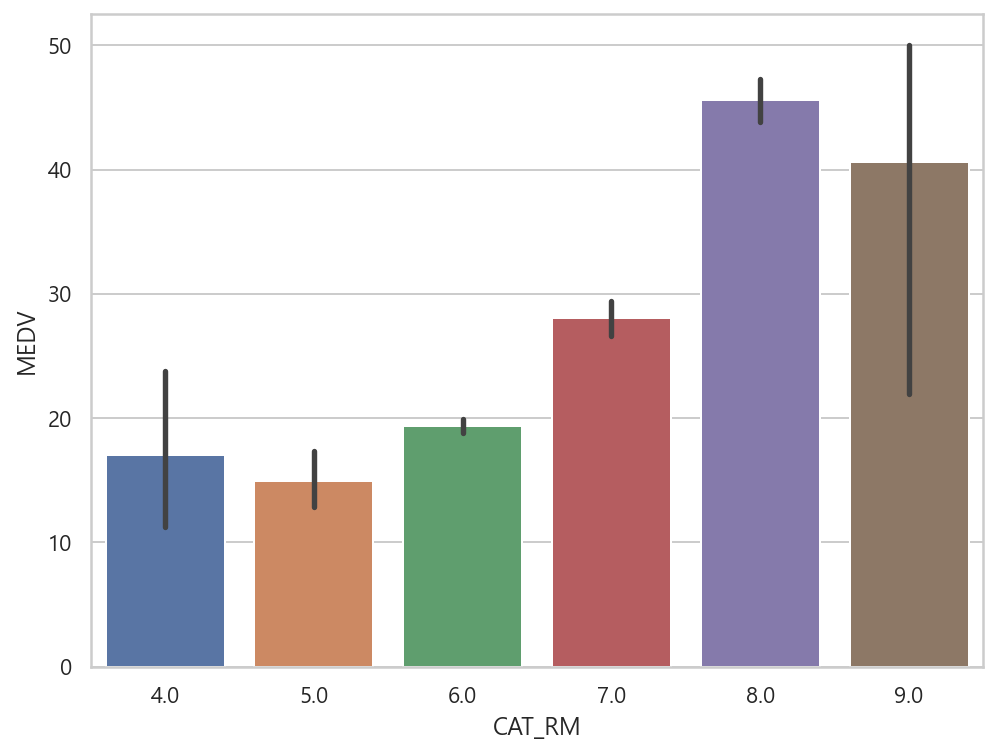

In [83]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)
plt.show() ; 

### RM을 범주형 데이터로 변형하면
- RM 변수로 인한 종속변수의 변화를 비선형 상수항으로 모형화 할 수 있게 된다. 
- 선형 모형에서보다 성능이 향상 된다.

In [84]:
model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))", data=df_boston)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.57e-81
Time:                        16:00:57   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

## 시간 독립변수의 변형
- 일별 사용량, 판매량 등 시계열 데이터에서 모형의 성능을 높이기 위한 방법
    - 독립변수가 시간인 경우는 특정 시점에서 경과된 시간값으로 변형해준다.
    - 시간값에서 여러가지 특징값들을 추가로 생성하여 독립변수로 사용한다.

### 일간 전기 사용량 데이터

In [85]:
data = sm.datasets.get_rdataset("elecdaily", package="fpp2")
data

<class 'statsmodels.datasets.utils.Dataset'>

In [86]:
df_elec = data.data.drop(columns=["WorkDay", "Temperature"])
df_elec

,Demand
0,174.896295
1,188.590935
2,188.916891
3,173.814244
4,169.515175
...,...
360,173.727990
361,188.512817
362,191.273009
363,186.240144


In [89]:
df_elec["Date"] = pd.date_range("2014-1-1", "2014-12-31")
df_elec.tail()

,Demand,Date
360,173.727990,2014-12-27
361,188.512817,2014-12-28
362,191.273009,2014-12-29
363,186.240144,2014-12-30
364,186.370181,2014-12-31


### 특정 시점으로부터 경과한 시간 계산
- toordinal 명령 : 특정 시점으로부터 경과한 시간 계산
- timestamp 메서드 : 초단위 값 계산

In [90]:
import datetime as dt

In [92]:
df_elec["Ordinal"] = df_elec.Date.map(dt.datetime.toordinal)
df_elec["Timestamp"] = df_elec.Date.map(dt.datetime.timestamp)
df_elec.tail()

,Demand,Date,Ordinal,Timestamp
360,173.727990,2014-12-27,735594,1.419606e+09
361,188.512817,2014-12-28,735595,1.419692e+09
362,191.273009,2014-12-29,735596,1.419779e+09
363,186.240144,2014-12-30,735597,1.419865e+09
364,186.370181,2014-12-31,735598,1.419952e+09


In [93]:
df_elec.head()

,Demand,Date,Ordinal,Timestamp
0,174.896295,2014-01-01,735234,1.388502e+09
1,188.590935,2014-01-02,735235,1.388588e+09
2,188.916891,2014-01-03,735236,1.388675e+09
3,173.814244,2014-01-04,735237,1.388761e+09
4,169.515175,2014-01-05,735238,1.388848e+09


### 일단위 시간값으로 회귀분석
- 시간값은 단위가 크므로 스케일링을 해준다.

In [94]:
model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)", data=df_elec)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           0.000739
Time:                        16:32:20   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

### 시간값의 여러가지 특징들
- 시간 데이터는 연, 월, 일, 요일 등의 더 많은 데이터로 분리할 수 있다.
- 이러한 특징 데이터가 많아질 수록 모형의 성능이 향상 되는 것을 알 수 있다.

In [97]:
# 연도
df_elec["Year"] = df_elec.Date.dt.year
# 월
df_elec["Month"] = df_elec.Date.dt.month
# 1년중 몇일째
df_elec["DayOfYear"] = df_elec.Date.dt.dayofyear
# 월별 총 일수 12 = 31
df_elec["DayOfMonth"] = df_elec.Date.dt.daysinmonth
# 현재 주의 몇번째 날
df_elec["DayOfWeek"] = df_elec.Date.dt.dayofweek
# 현재 연도의 몇번째 주
df_elec["WeekOfYear"] = df_elec.Date.dt.weekofyear
# 현재 주의 몇번쨰 날 = Day of Week 과 같음
df_elec["Weekday"] = df_elec.Date.dt.weekday
# 현재 달의 첫번째 일이면 True, 아니면 False
df_elec["IsMonthStart"] = df_elec.Date.dt.is_month_start
# 현재 달의 마지막 날이면 True, 아니면 False
df_elec["IsMonthEnd"] = df_elec.Date.dt.is_month_end
df_elec.tail()

,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,173.727990,2014-12-27,735594,1.419606e+09,2014,12,361,31,5,52,5,False,False
361,188.512817,2014-12-28,735595,1.419692e+09,2014,12,362,31,6,52,6,False,False
362,191.273009,2014-12-29,735596,1.419779e+09,2014,12,363,31,0,1,0,False,False
363,186.240144,2014-12-30,735597,1.419865e+09,2014,12,364,31,1,1,1,False,False
364,186.370181,2014-12-31,735598,1.419952e+09,2014,12,365,31,2,1,2,False,True


### 시간 특징 데이터가 추가된 데이터의 회귀 분석
- Date 변수에서 새로 생성한 시간 독립변수들이 추가되면 모형의 성능이 나아진다.

In [98]:
feature_names = df_elec.columns.tolist()
feature_names.remove("Demand")
feature_names.remove("Date")

In [100]:
formula = """
Demand ~ scale(Ordinal) + C(Month) + DayOfYear + C(DayOfMonth) + 
C(DayOfWeek) + C(Weekday) + C(IsMonthStart) + C(IsMonthEnd)"""

model6 = sm.OLS.from_formula(formula, data=df_elec)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.74e-46
Time:                        16:40:44   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [101]:
formula = """
Demand ~ scale(Ordinal) + C(Month) + DayOfYear + C(DayOfMonth) + 
C(DayOfWeek) + WeekOfYear + C(Weekday) + C(IsMonthStart) + C(IsMonthEnd)"""

model6_5 = sm.OLS.from_formula(formula, data=df_elec)
result6_5 = model6_5.fit()
print(result6_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     19.64
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.04e-46
Time:                        16:44:20   Log-Likelihood:                -1571.4
No. Observations:                 365   AIC:                             3187.
Df Residuals:                     343   BIC:                             3273.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## 주기성을 가지는 독립변수
- siant hong > scikit_learn_data > covtype 폴더 디렉토리를 삭제하니까 임포트가 된다.
    - 다운로드 디렉토리가 손상된 것 같음.
    - 에러 해결 관련 페이지 : https://stackoverflow.com/questions/59192681/how-can-i-load-sklearn-data-in-jupyter-python-3

#### 사이킷런 버전 확인

In [6]:
import sklearn

sklearn.__version__

'1.0.1'

In [7]:
!pip list | grep scikit

scikit-image                       0.18.3
scikit-learn                       1.0.1
scikit-surprise                    1.1.0


You should consider upgrading via the 'C:\DS\Anaconda3\python.exe -m pip install --upgrade pip' command.


#### 사이킷런 버전 업데이트

In [8]:
!pip install scikit-learn --user --upgrade

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)


You should consider upgrading via the 'C:\DS\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
covtype

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3]),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wildernes

In [4]:
feature_names = ["Aspect", "Hillshade_9am"]
df_covtype = pd.DataFrame(covtype.data[:, [1, 6]], columns=feature_names)
df_covtype = df_covtype.sample(10000, random_state=0)
df_covtype.tail()

,Aspect,Hillshade_9am
77297,90.0,235.0
103214,38.0,220.0
459385,79.0,241.0
159359,58.0,225.0
565783,91.0,240.0


In [6]:
df_covtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215988 to 565783
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aspect         10000 non-null  float64
 1   Hillshade_9am  10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4 KB


In [7]:
df_covtype["Aspect"].min(), df_covtype["Aspect"].max()

(0.0, 360.0)

In [8]:
df_covtype.describe()

,Aspect,Hillshade_9am
count,10000.000000,10000.000000
mean,153.860000,212.520300
std,111.313091,26.642597
min,0.000000,60.000000
25%,58.000000,199.000000
50%,125.000000,218.000000
75%,255.000000,231.000000
max,360.000000,254.000000


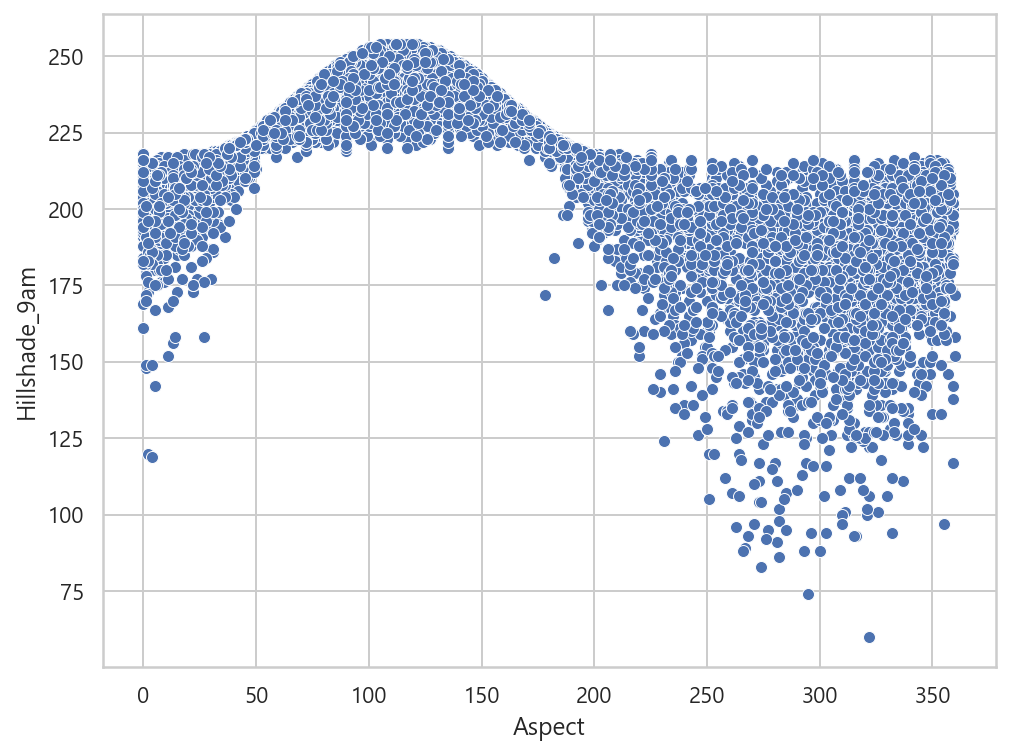

In [10]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.show() ; 

In [14]:
df_covtype[df_covtype["Aspect"] == 0.0]["Hillshade_9am"].tolist()

[200.0,
 207.0,
 193.0,
 218.0,
 208.0,
 194.0,
 192.0,
 191.0,
 184.0,
 192.0,
 212.0,
 196.0,
 210.0,
 218.0,
 202.0,
 208.0,
 217.0,
 195.0,
 216.0,
 188.0,
 194.0,
 207.0,
 212.0,
 199.0,
 206.0,
 217.0,
 198.0,
 169.0,
 194.0,
 213.0,
 199.0,
 208.0,
 211.0,
 218.0,
 183.0,
 215.0,
 206.0,
 161.0,
 218.0,
 215.0,
 208.0,
 212.0,
 202.0,
 210.0,
 194.0,
 217.0,
 211.0,
 213.0,
 216.0,
 213.0,
 208.0,
 206.0,
 215.0,
 212.0,
 208.0,
 208.0,
 206.0,
 198.0,
 197.0,
 202.0,
 192.0,
 188.0,
 193.0,
 215.0,
 201.0,
 206.0,
 211.0,
 206.0,
 216.0,
 218.0,
 204.0,
 215.0,
 218.0,
 216.0,
 196.0,
 182.0,
 202.0,
 216.0,
 194.0,
 200.0,
 210.0,
 207.0,
 199.0,
 183.0,
 206.0,
 216.0,
 216.0,
 209.0,
 212.0]

In [15]:
df_covtype[df_covtype["Aspect"] == 360.0]["Hillshade_9am"].tolist()

[158.0, 152.0, 172.0]

In [16]:
df_covtype[df_covtype["Aspect"] == 360.0]

,Aspect,Hillshade_9am
239304,360.0,158.0
157374,360.0,152.0
280237,360.0,172.0


In [17]:
model7 = sm.OLS.from_formula(
    "Hillshade_9am ~ Aspect + I(Aspect**2) + I(Aspect**3)", data=df_covtype)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7974.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:33:00   Log-Likelihood:                -40905.
No. Observations:               10000   AIC:                         8.182e+04
Df Residuals:                    9996   BIC:                         8.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        187.0395      0.485    385.

In [18]:
df_test = pd.DataFrame([[0], [360]], columns=["Aspect"])
df_test

,Aspect
0,0
1,360


In [19]:
df_result7 = result7.predict(df_test)
df_result7

0    187.039453
1    193.002560
dtype: float64

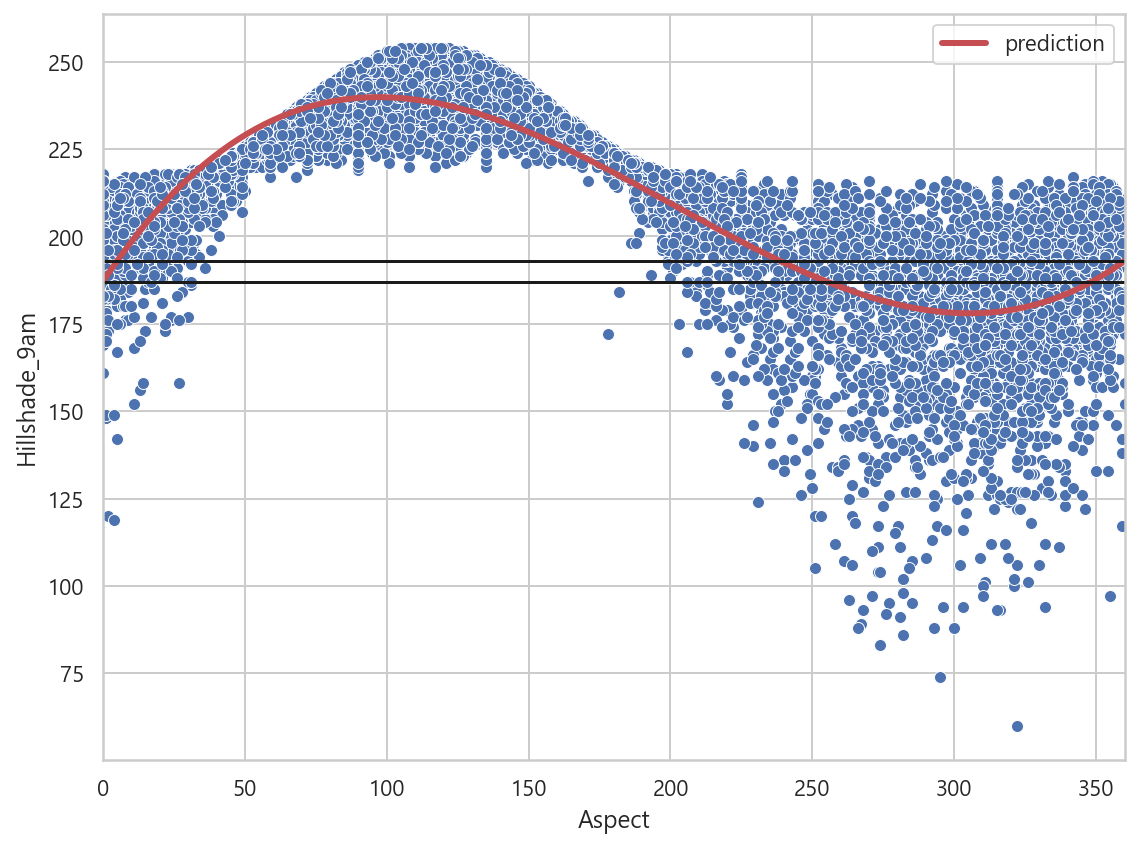

In [41]:
y_hat7 = result7.predict(df_covtype)
df7 = pd.concat([y_hat7, df_covtype.Aspect], axis=1).sort_values("Aspect")
df7.columns = ["prediction", "Aspect"]

df7.plot(x="Aspect", style="r-", lw=3, figsize=(8, 6))
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result7.values[0], 0, 360, "k")
plt.hlines(df_result7.values[1], 0, 360, "k")
plt.xlim(0, 360)
plt.tight_layout()
plt.show() ; 

In [42]:
f = 2.0 * np.pi / 360

model8 = sm.OLS.from_formula("""
Hillshade_9am ~ 
np.cos(f * Aspect) + 
np.sin(f * Aspect)""", data=df_covtype)

result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:45:10   Log-Likelihood:                -40515.
No. Observations:               10000   AIC:                         8.104e+04
Df Residuals:                    9997   BIC:                         8.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8444      0

In [43]:
df_result8 = result8.predict(df_test)
df_result8

0    196.069868
1    196.069868
dtype: float64

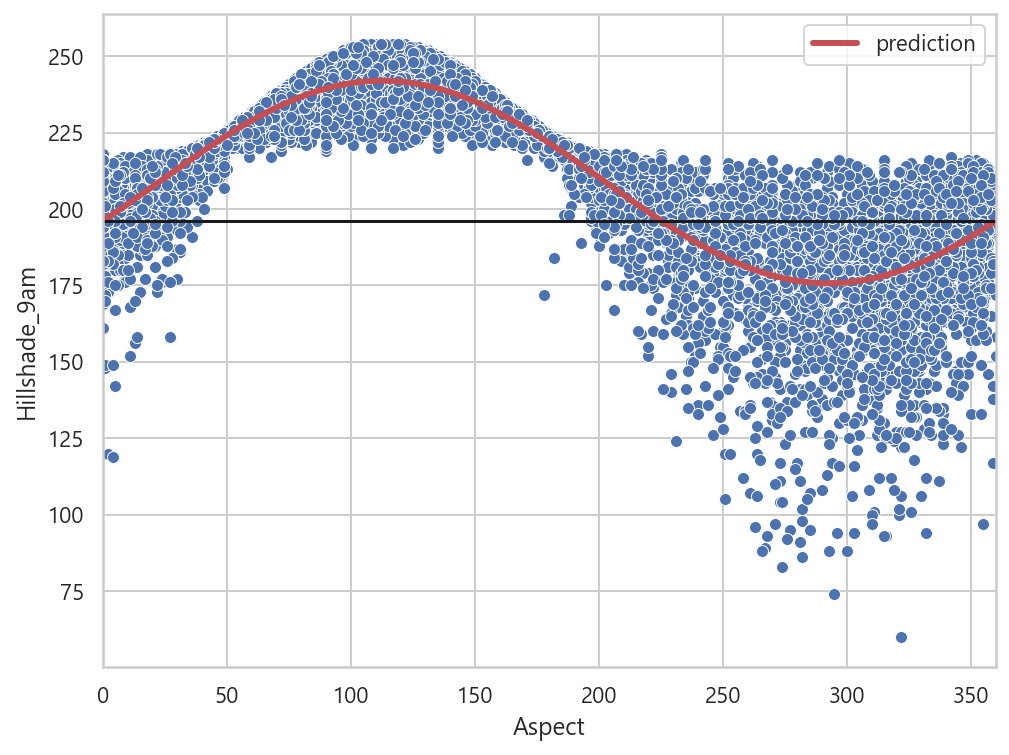

In [46]:
y_hat8 = result8.predict(df_covtype)
df8 = pd.concat([y_hat8, df_covtype.Aspect], axis=1).sort_values("Aspect")
df8.columns = ["prediction", "Aspect"]

df8.plot(x="Aspect", style="r-", lw=3, figsize=(8, 6))
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result8.values[0], 0, 360, "k")
plt.hlines(df_result8.values[1], 0, 360, "k")
plt.xlim(0, 360)
plt.show() ; 

## 종속변수 변형
- 경우에 따라서는 독립변수가 아닌 종속변수를 변형할 수 있다.
    - 독립변수와 종속변수를 변형하는 이유는 독립변수와 종속변수의 관계가 비선형 관계인 경우 선형관계로 만들어주기 위함이다.
    - 경우에 따라서 어떤 변수를 변형 시켜주어야 하는지는 데이터의 상황에 따라 다르다.

### LSTAT 독립변수로 집값을 예측하는 선형회귀모형의 예측값과 실제값

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfy, dfx], axis=1)
df_boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
model_lstat = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result_lstat = model_lstat.fit()
print(result_lstat.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        00:23:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [15]:
y_hat1 = result_lstat.predict(df_boston)
df_lstat = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df_lstat.columns = ["prediction", "LSTAT"]
df_lstat.head()

,prediction,LSTAT
161,32.910255,1.73
162,32.729746,1.92
40,32.672743,1.98
232,32.207219,2.47
192,31.827199,2.87


### 비선형 변환의 시도
- 올바른 모형의 경우 예측치와 실제 종속 변수값의 스캐터 플롯은 선형적인 모습이 나와야 한다.
- 그러나 실제로는 제곱근이나 로그 그래프와 더 유사하게 나타난다.
- 이러한 경우는 스캐터 플롯을 선형적으로 만들어 주도록 예측치를 비선형 변환한다.
- 독립변수와 종속변수를 비선형 변환 하면서 여러 모형을 비교해 볼 수 있다.

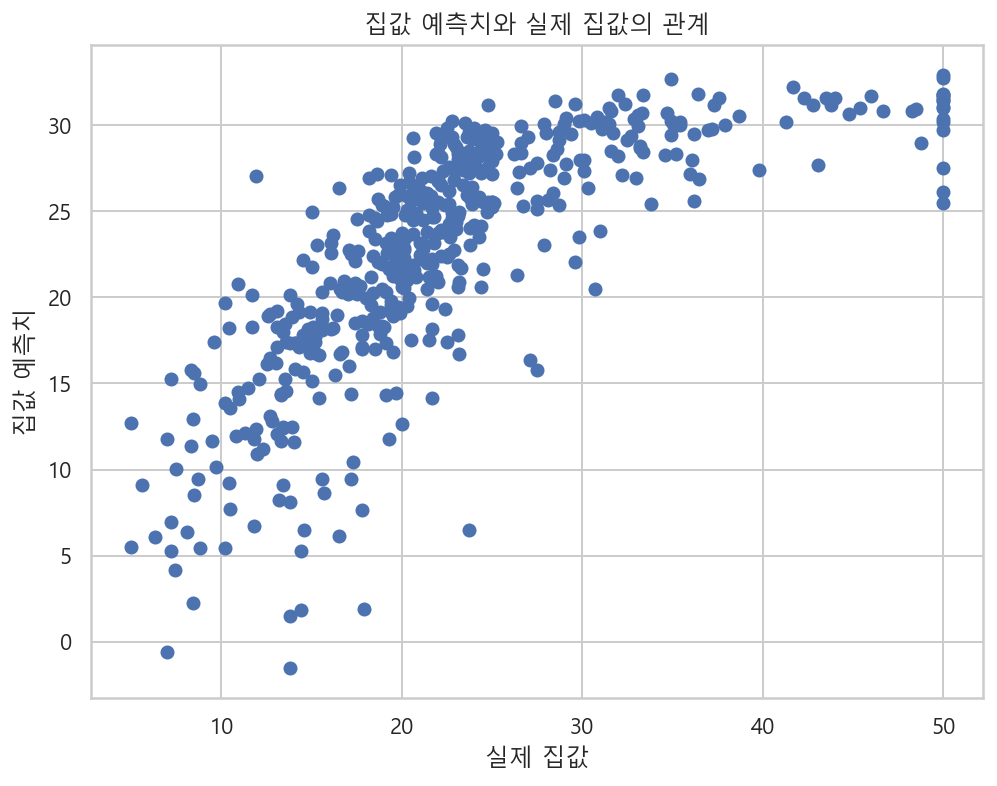

In [17]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(boston.target, y_hat1)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show() ; 

### 종속변수에 제곱근을 적용하여 비선형 변환

In [18]:
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          3.09e-105
Time:                        00:29:35   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

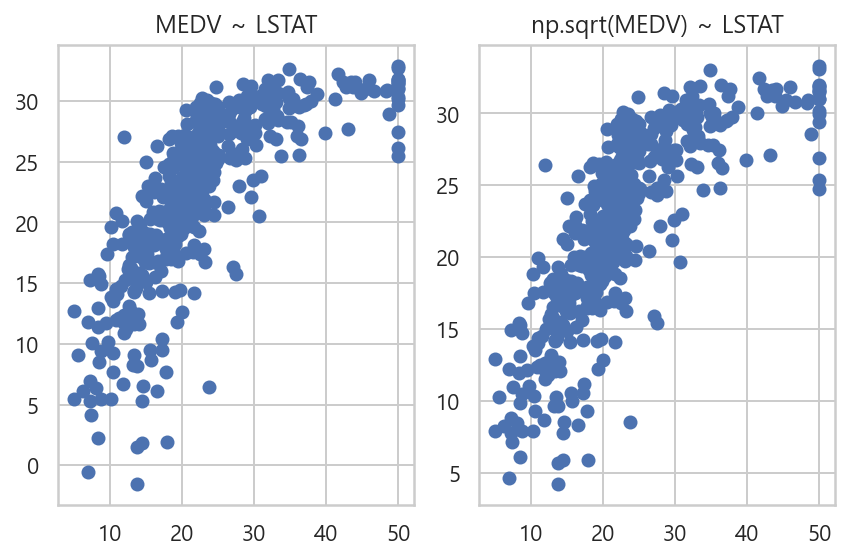

In [19]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show() ; 

In [20]:
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.23e-116
Time:                        00:32:05   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

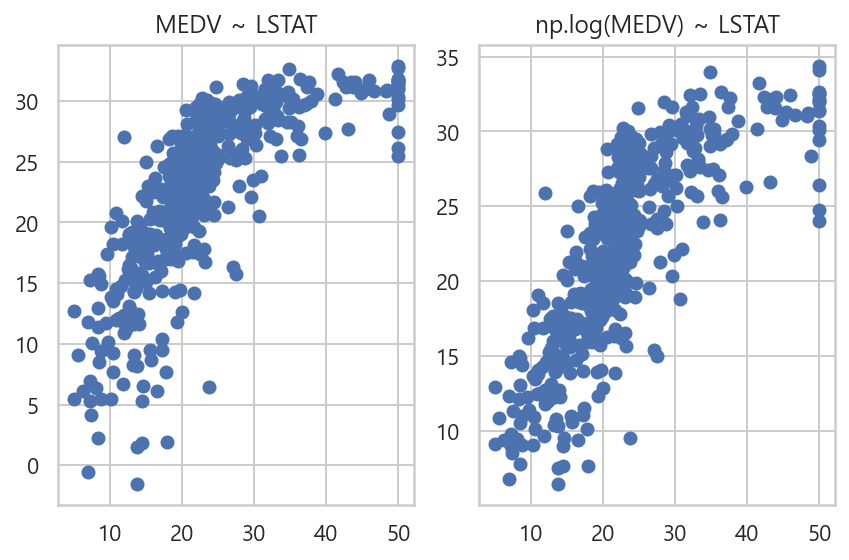

In [22]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show() ; 

In [23]:
model13 = sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)", data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          7.32e-126
Time:                        00:35:45   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

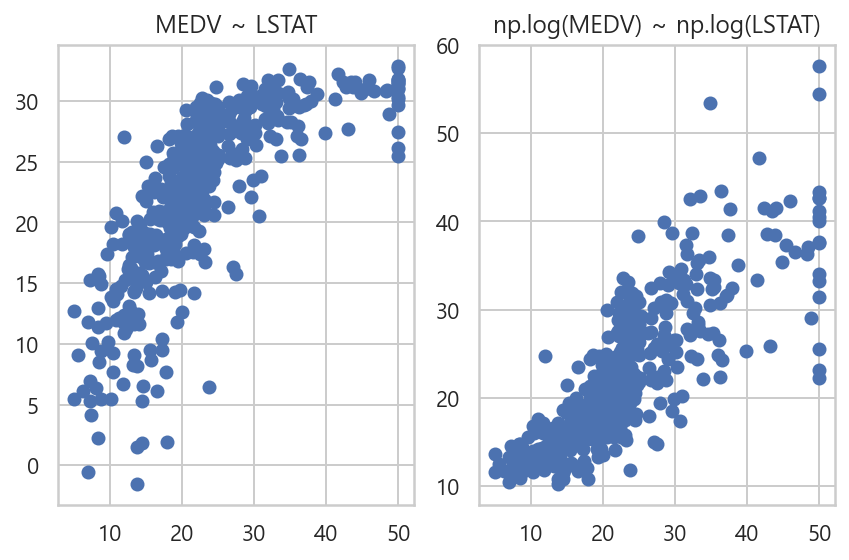

In [26]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")
plt.tight_layout()
plt.show() ; 

In [27]:
print("r2_11 : {}, r2_12 : {}, r2_13 : {}".format(result11.rsquared, result12.rsquared, result13.rsquared))

r2_11 : 0.610408978599037, r2_12 : 0.6480799374211881, r2_13 : 0.6772632131699525
